In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from visualization_helper import init_plot_style
from conversation_helper import conversation_filter

In [82]:
init_plot_style()

In [83]:
%%time
ds = pd.read_csv('/Users/john/data/twitter/twconvcharact/tweets_ec_nd_conv_dt.csv', 
        usecols=['id', 
                 'conversation_id',
                 'num_replies',
                 'created_at',
                 'timestamp',
                 'hashtags'
                ],
                 dtype={
                     'in_reply_to_status_id': object,
                       },
                 parse_dates=['timestamp'],
                )
ds.shape

CPU times: user 13.4 s, sys: 1.52 s, total: 14.9 s
Wall time: 15.3 s


In [84]:
ds.shape

(2716464, 6)

In [11]:
print(ds.timestamp.min())
print(ds.timestamp.max())

2009-03-07 17:57:46
2017-07-12 21:13:52


In [87]:
ds[~ds.hashtags.isnull()].shape[0] /ds.shape[0]

0.2543979968076146

In [13]:
ds.groupby('hashtags').size().sort_values(ascending=False).head(10)

hashtags
KCAEstrellaLatina;JuanpaZurita                           12288
trndnl                                                    7692
Endomondo;endorphins                                      5312
Guayaquil                                                 5120
VideoMTV2016                                              3769
Ecuador                                                   3225
VideoLove                                                 2931
Repost                                                    2380
ReggaetonLento;HeyDJ;KCAMexico                            1889
JuanpaZuritaTrendy;SebastianVillalobosVideo;KCAMexico     1765
dtype: int64

In [68]:
dsh = ds[ds.hashtags.isin(['VideoMTV2016'])]
dsh['created']=dsh.timestamp.dt.date
dsh.shape

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3769, 7)

In [69]:
dsh['num_replies']=dsh['num_replies']-1
dsh=dsh[dsh.created < datetime.date(2017,1,2)]
ts1=dsh.groupby('created').agg({'id':'count','num_replies': 'sum'})
ts1.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,num_replies
created,,
2016-12-20,384,2
2016-12-21,750,165
2016-12-22,458,875
2016-12-23,475,25
2016-12-24,112,209


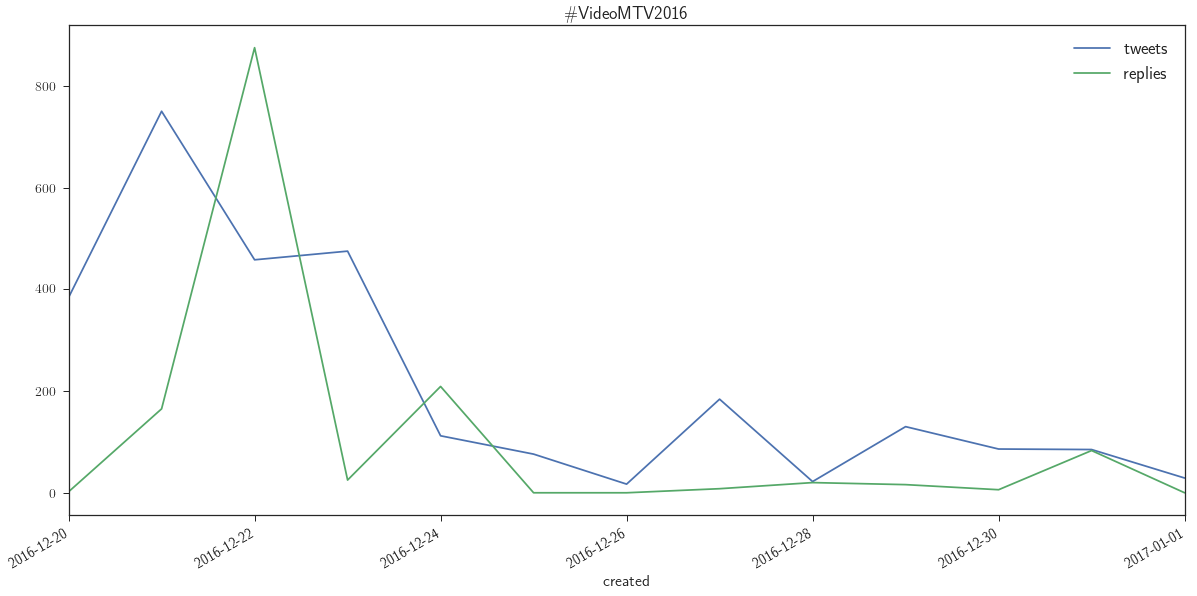

In [80]:
import datetime
ds2=dsh[['id','created']]
#ds2=ds2[ds2.created > datetime.date(2016,12,31)]
#ds2=ds2[ds2.created < datetime.date(2017,4,1)]
#ts=ds2.groupby('created').size()
fig=plt.figure(figsize=(20,10))
ts1.id.plot()
ts1.num_replies.plot()
fig.autofmt_xdate()
plt.legend(['tweets', 'replies'], fontsize=18)
plt.title('\#VideoMTV2016', fontsize=18)
#plt.ylim([10000, ts.max()+500])